In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
data = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv', index_col='sl_no')
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


* Salary has missing data values for students who have not been placed
* All other columns have no missing values

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# Heat Map


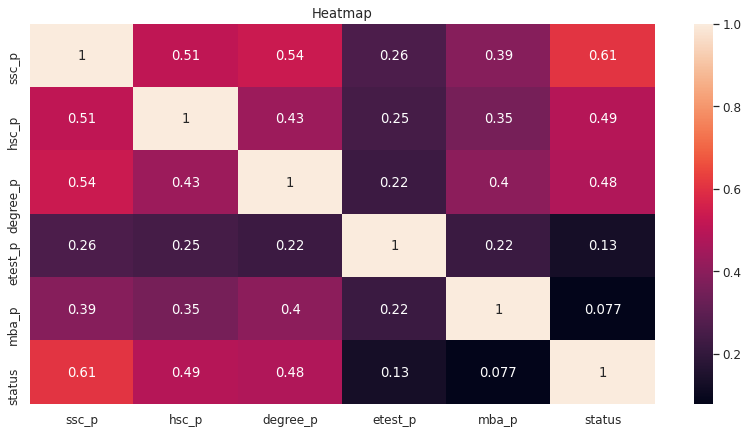

In [6]:
data2 = data.copy()
data2['status'] = data2['status'].map({'Placed':1, 'Not Placed': 0}).astype(int)
plt.figure(figsize=(14,7))
plt.title('Heatmap')
sns.heatmap(data=data2.drop('salary', axis=1).corr(), annot=True)

* High correlation between status and (ssc_p, hsc_p, degree_p)
* Low correlation between status and (etest_p, mba_p)

# Relation between different marks


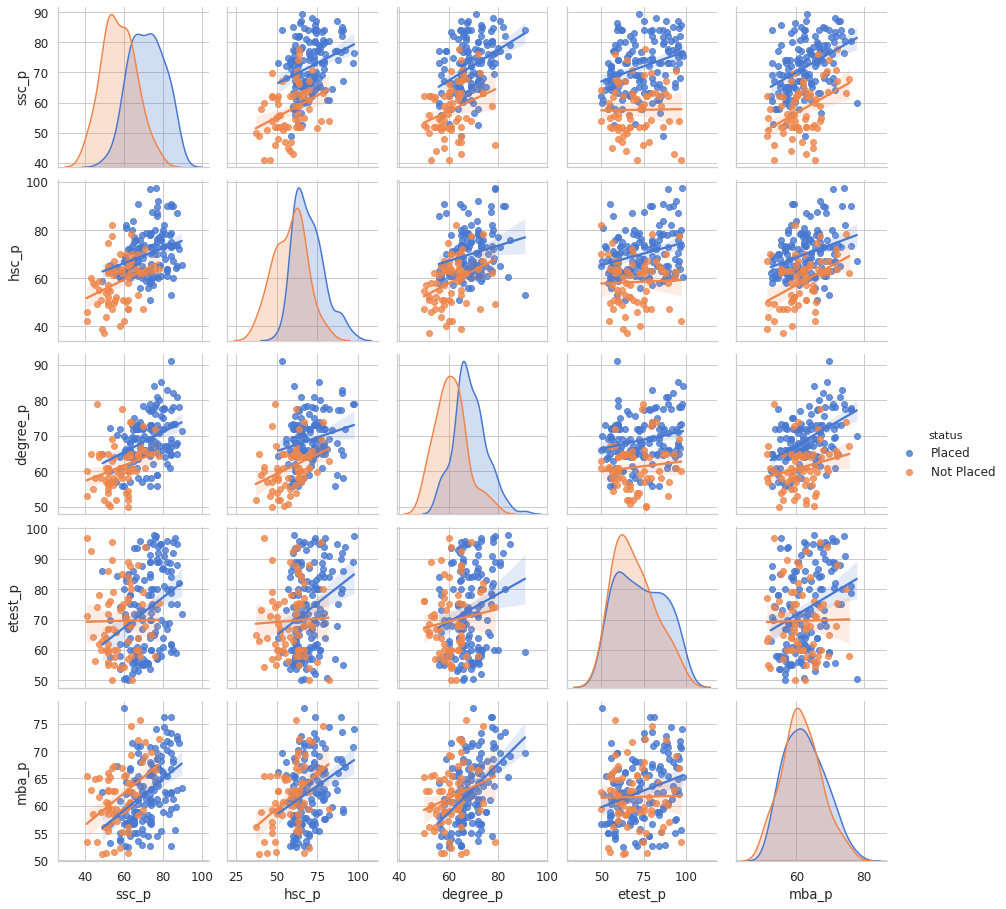

In [7]:
sns.pairplot(data, vars=['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], hue='status', kind='reg')

* For pairs of (ssc_p v/s hsc_p), (ssc_p v/s degree_p), (hsc_p v/s degree_p) it can be estabilished that good performance in all three fronts relate to higher chances of getting placed
* The other two columns do not point to any such correlation. The marks obtained in them seem to have no influence on the placement

# Gender

Text(0.5, 1.0, 'Placed students etest vs Gender')

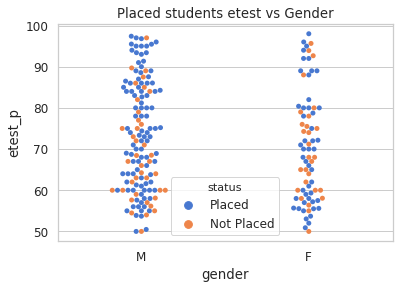

In [8]:
data_placed=data.loc[data.status=="Placed"]
data_unplaced=data.loc[data.status=="Not Placed"]
temp_df=data_placed.loc[data_placed.gender=="F"]
Female_placed=temp_df.shape[0]
Male_placed=data_placed.shape[0]-Female_placed

temp_df=data_unplaced.loc[data_unplaced.gender=="M"]
Male_unplaced=temp_df.shape[0]
Female_unplaced=data_unplaced.shape[0]-Male_unplaced
t_male=(Male_placed+Male_unplaced)
t_female=(Female_unplaced+Female_placed)
t_student=t_male+t_female
data_of_gender={"Particular": [" Males Placed","Female Placed","Male Unplaced","Female Unplaced"] ,
                "No. of Student" : [Male_placed,Female_placed,Male_unplaced,Female_unplaced],
                "Student per Gender":[Male_placed/t_male,Female_placed/t_female,Male_unplaced/t_male,Female_unplaced/t_female],
                "Student per student":[Male_placed/t_student,Female_placed/t_student,Male_unplaced/t_student,Female_unplaced/t_student]
               }
gender_df=pd.DataFrame(data_of_gender,columns=["Particular","No. of Student","Student per Gender","Student per student"])
plt.figsize=(12,6)
sns.swarmplot(x=data["gender"],y=data["etest_p"],hue=data['status'])
plt.title("Placed students etest vs Gender")

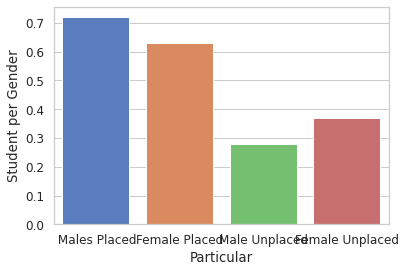

In [9]:
plt.figsize=(12,6)
sns.barplot(x=gender_df["Particular"],y=gender_df["Student per Gender"])

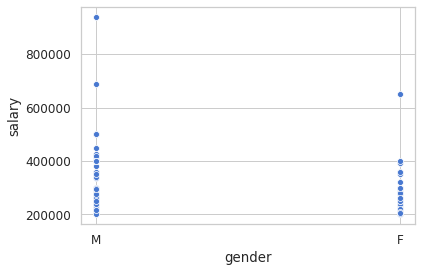

In [10]:

sns.scatterplot(x=data['gender'],y=data["salary"])

* Males have a slighly higher probabilty of getting placed when compared to females
* 71.9% males get placed compared to 63% female


# Senior Secondary

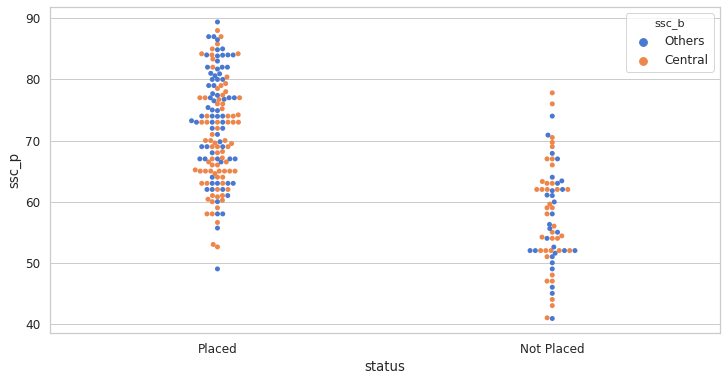

In [11]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['status'], y=data['ssc_p'], hue=data['ssc_b'])

In [12]:
data2[['ssc_b','status']].groupby(['ssc_b'], as_index=False).mean()

,ssc_b,status
0,Central,0.672414
1,Others,0.707071


* No major diffrence in centrer board or other board w.r.t placement probability
* On an average, more percentage score in ssc increases chances of placement
* ssc_p > 80 are always placed
* ssc_p < 50 are not placed

# High School

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,67.000000,67.000000,67.000000,67.000000,67.000000,0.0
mean,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
std,8.394246,9.914090,6.365825,11.930687,5.705689,NaN
min,40.890000,37.000000,50.000000,50.000000,51.210000,NaN
25%,52.000000,51.000000,57.000000,60.000000,58.480000,NaN
50%,56.280000,60.330000,61.000000,67.000000,60.690000,NaN
75%,63.000000,64.000000,65.000000,76.500000,65.405000,NaN
max,77.800000,82.000000,79.000000,97.000000,75.710000,NaN


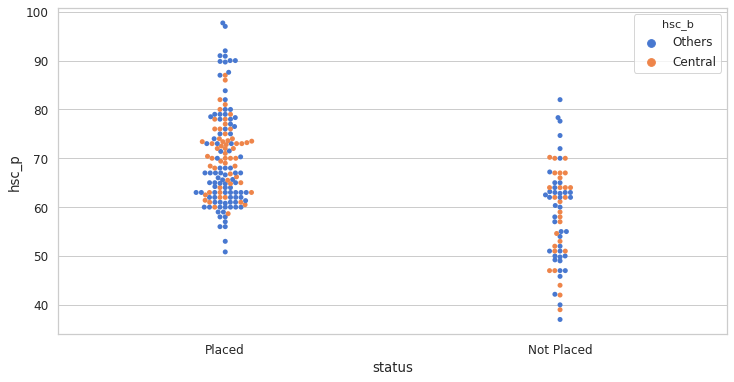

In [13]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['status'],y=data['hsc_p'],hue=data['hsc_b'])
data_unplaced.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,67.000000,67.000000,67.000000,67.000000,67.000000,0.0
mean,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
std,8.394246,9.914090,6.365825,11.930687,5.705689,NaN
min,40.890000,37.000000,50.000000,50.000000,51.210000,NaN
25%,52.000000,51.000000,57.000000,60.000000,58.480000,NaN
50%,56.280000,60.330000,61.000000,67.000000,60.690000,NaN
75%,63.000000,64.000000,65.000000,76.500000,65.405000,NaN
max,77.800000,82.000000,79.000000,97.000000,75.710000,NaN


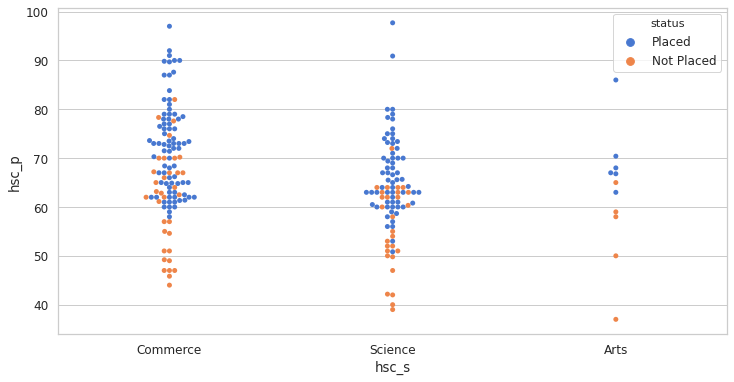

In [14]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['hsc_s'],y=data['hsc_p'],hue=data['status'])
data_unplaced.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,131.000000,131.000000,131.00000,131.000000,131.000000,91.000000
mean,67.882901,66.162977,66.76542,72.515344,62.698550,288098.901099
std,11.288364,11.773989,7.55032,13.670248,5.984145,78399.695995
min,40.890000,37.000000,52.00000,50.000000,51.580000,200000.000000
25%,60.200000,60.000000,61.13000,60.000000,58.110000,240000.000000
50%,69.000000,64.000000,66.00000,71.000000,62.350000,265000.000000
75%,77.000000,73.000000,71.86000,86.000000,66.940000,300000.000000
max,89.400000,97.700000,91.00000,97.400000,77.890000,650000.000000


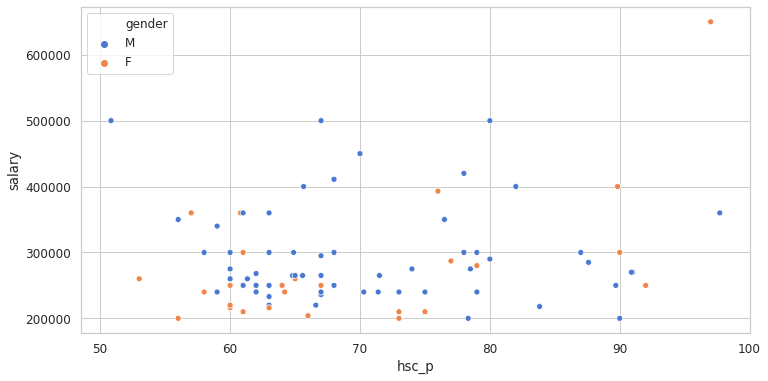

In [15]:
temp_df=data.loc[data.hsc_b=="Others"]
plt.figure(figsize=(12,6))
sns.scatterplot(x=temp_df['hsc_p'],y=temp_df['salary'],hue=temp_df["gender"])
temp_df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,84.000000,84.000000,84.000000,84.000000,84.000000,57.000000
mean,66.399643,66.598571,65.753810,71.453690,61.622619,289543.859649
std,10.065292,9.431122,7.049742,12.690093,5.561838,114227.384472
min,41.000000,39.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.950000,62.000000,60.975000,60.000000,57.685000,240000.000000
50%,66.500000,67.500000,65.300000,70.500000,61.700000,260000.000000
75%,73.000000,73.000000,72.000000,80.100000,64.495000,300000.000000
max,88.000000,87.000000,84.000000,98.000000,76.260000,940000.000000


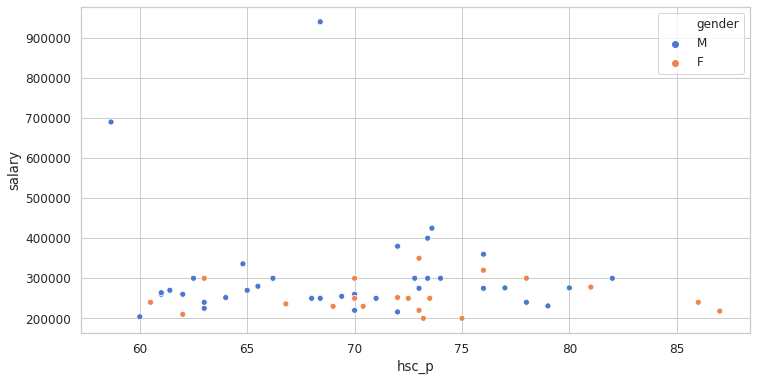

In [16]:
temp_df=data.loc[data.hsc_b=="Central"]
plt.figure(figsize=(12,6))
sns.scatterplot(x=temp_df['hsc_p'],y=temp_df['salary'],hue=temp_df["gender"])
temp_df.describe()

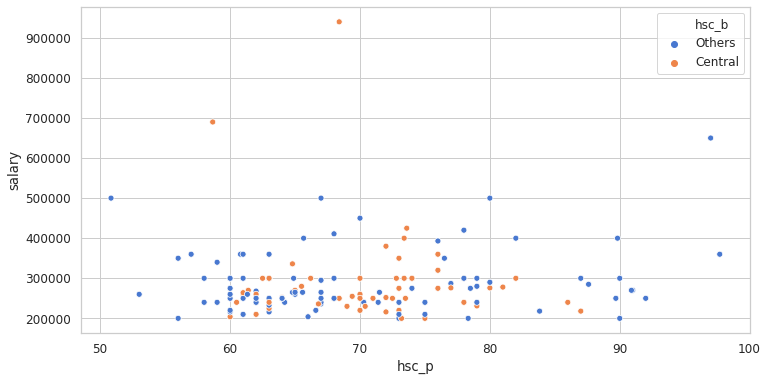

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['hsc_p'],y=data['salary'],hue=data["hsc_b"])

* Max of high school percentage(hsc_p) hsc_p of Others Board is greater than Central Board 
* Percent of students placed almost equal at 70% irrepecting of their high school board(hsc_b) 
* Huge gender disparity in salary in Other board vs Not so much in Central board. 
* Clear from the visual data that lower % in high school(<55%) means no placement or very little chance of placement.
* Central board > 70% guarantees placement while in Other board >80% guarantees placement.
* Above >85% in science stream means guaranteed placement and <=55% means no placement.
* While >75% in Commerece guarantees placement
* Data too small for any comment on arts stream

# Bachelor's Degree

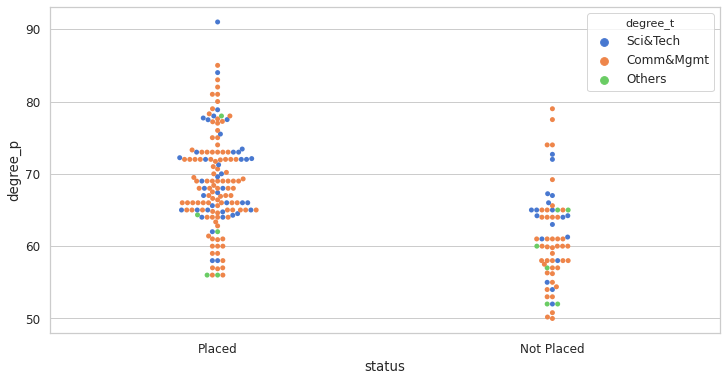

In [18]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['status'], y=data['degree_p'], hue=data['degree_t'])

In [19]:
data2[['degree_t','status']].groupby(['degree_t'], as_index=False).mean()

,degree_t,status
0,Comm&Mgmt,0.703448
1,Others,0.454545
2,Sci&Tech,0.694915


* No major diffrence in Comm&Mgmt and Sci&Tech w.r.t placement probability. Others has less placement but very less data points so we treat it as inconclusive. 
* On an average, more percentage score in bachelors degree increases chances of placement
* degree_p > 80 are always placed
* degree_p < 55 are not placed

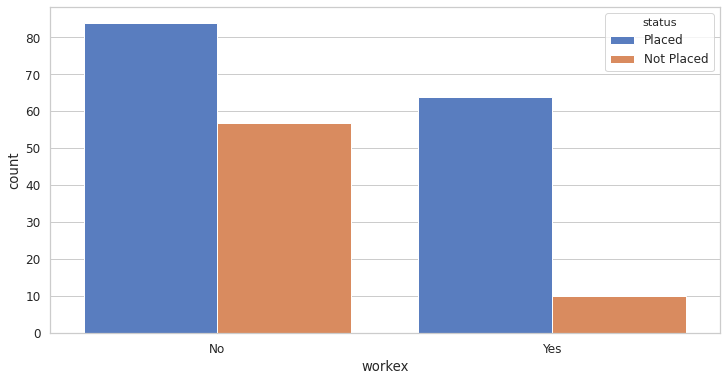

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x="workex",hue="status",data=data)

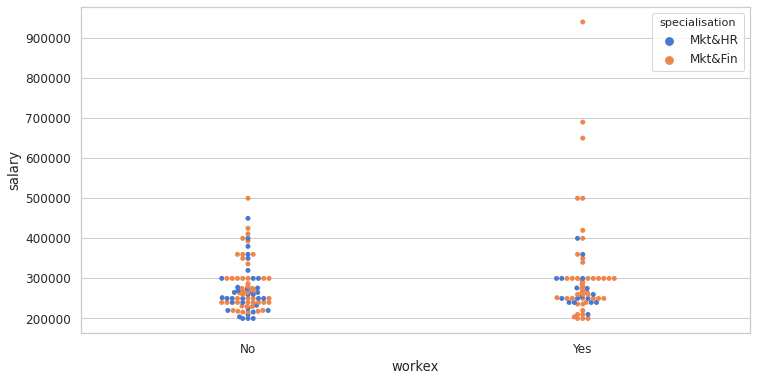

In [21]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['workex'],y=data['salary'],hue=data['specialisation'])

* Workex vs Salary has no relation 
* If student has workex, chances of placement are very high.
* Suprisingly, students who do not have workex have still have 60% chance of placement.

# Employability Test

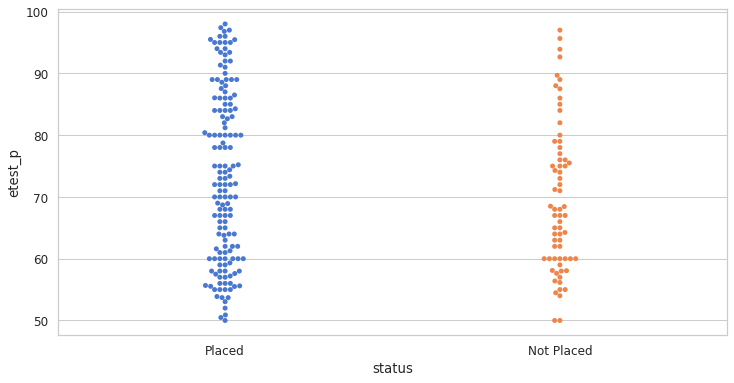

In [22]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['status'], y=data['etest_p'])

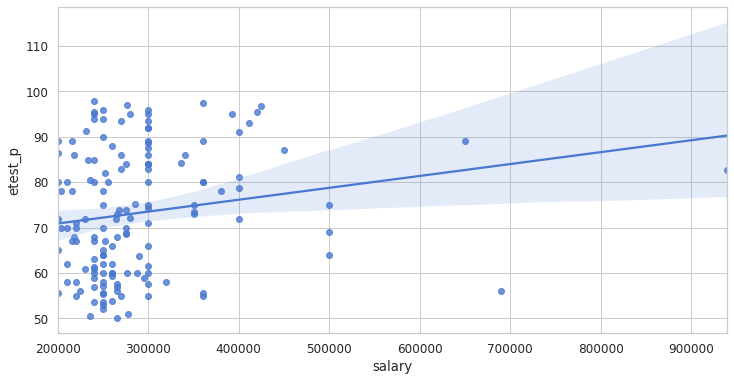

In [23]:
plt.figure(figsize=(12,6))
sns.regplot(x=data['salary'], y=data['etest_p'])

* employability test score does not impact placement.
* Salary seems to increase with increase in employability test score.

# MBA

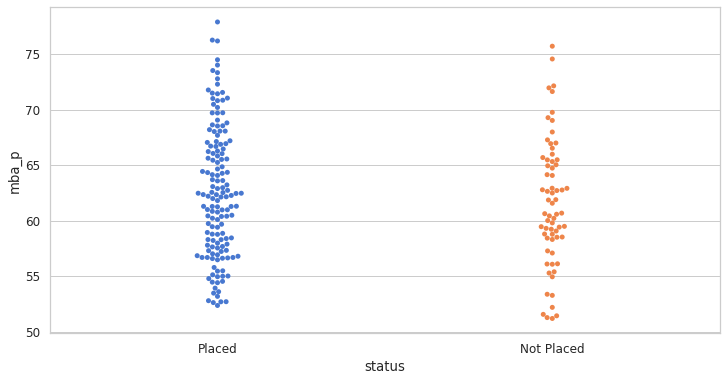

In [24]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data['status'],y=data['mba_p'])


In [25]:
data2[['specialisation','status']].groupby(['specialisation'], as_index=False).mean()

,specialisation,status
0,Mkt&Fin,0.791667
1,Mkt&HR,0.557895


In [26]:
data2[['specialisation','salary']].groupby(['specialisation'], as_index=False).median()


,specialisation,salary
0,Mkt&Fin,270000.0
1,Mkt&HR,255000.0


* No conclusive relation between mba_p and placement
* Mkt&Fin professionals have a higher chance in getting a placement than Mkt&Hr. Infact, 79% of Mkt&Fin get placed compared to just 55% of Mkt&HR
* Mkt&Fin have a slighly higher median salary than Mkt&Hr

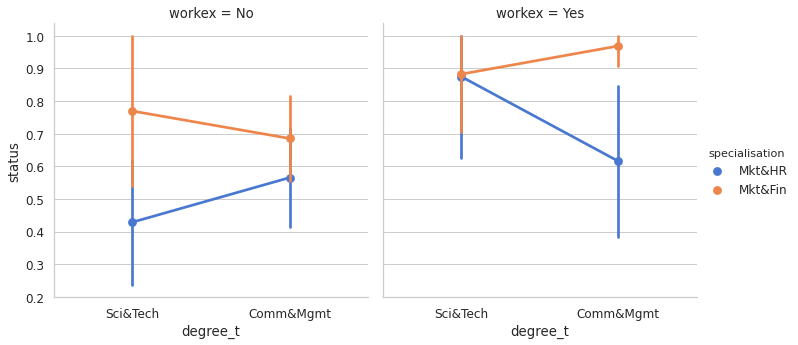

In [27]:
sns.catplot('degree_t', 'status', hue='specialisation', col='workex', 
            data=data2.loc[(data2['degree_t'] == 'Sci&Tech') | (data2['degree_t'] == 'Comm&Mgmt')], 
            kind='point')

* Mkt&Fin has better placements
* Students with workex have better placements
* Mkt&Fin coupled with Comm&Mgmt degree and prior work experience has almost 100% placement probability
* For others, data points are we can not really analyze anything from it.

# Model Building and Hosting
Please follow the link to the model building notebook
https://www.kaggle.com/aakashg1999/placement-prediction-model-building

Please the below link to the web app where the model is hosted
https://intense-castle-03852.herokuapp.com/